In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

movies = pd.read_csv('tmdb_movies.csv')
genres = pd.read_csv('tmdb_genres.csv')

In [2]:
quan3 = movies['vote_count'].quantile(0.75)
quan3
ex1 = movies[movies['vote_count'] > quan3]
ex1 = ex1.copy()
ex1.sort_values('vote_average', ascending=False, inplace=True)
ex1.iloc[:10]


,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
1881,1881,25000000,NaN,278,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,1994-09-23,28341469,142.0,Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,18.0
3337,3337,6000000,http://www.thegodfather.com/,238,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",143.659698,1972-03-14,245066411,175.0,Released,An offer you can't refuse.,The Godfather,8.4,5893,18.0
2294,2294,15000000,http://movies.disney.com/spirited-away,129,ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,118.968562,2001-07-20,274925095,125.0,Released,The tunnel led Chihiro to a mysterious town...,Spirited Away,8.3,3840,14.0
3865,3865,3300000,http://sonyclassics.com/whiplash/,244786,en,Whiplash,"Under the direction of a ruthless instructor, ...",192.528841,2014-10-10,13092000,105.0,Released,The road to greatness can take you to the edge.,Whiplash,8.3,4254,18.0
2731,2731,13000000,NaN,240,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,105.792936,1974-12-20,47542841,200.0,Released,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,8.3,3338,18.0
3232,3232,8000000,NaN,680,en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,1994-10-08,213928762,154.0,Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,53.0
1818,1818,22000000,http://www.schindlerslist.com/,424,en,Schindler's List,The true story of how businessman Oskar Schind...,104.469351,1993-11-29,321365567,195.0,Released,"Whoever saves one life, saves the world entire.",Schindler's List,8.3,4329,18.0
662,662,63000000,http://www.foxmovies.com/movies/fight-club,550,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,1999-10-15,100853753,139.0,Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,18.0
2170,2170,806948,NaN,539,en,Psycho,When larcenous real estate clerk Marion Crane ...,93.067866,1960-06-16,32000000,109.0,Released,The master of suspense moves his cameras into ...,Psycho,8.2,2320,18.0
1847,1847,25000000,http://www.warnerbros.com/goodfellas,769,en,GoodFellas,"The true story of Henry Hill, a half-Irish, ha...",63.654244,1990-09-12,46836394,145.0,Released,Three Decades of Life in the Mafia.,GoodFellas,8.2,3128,18.0


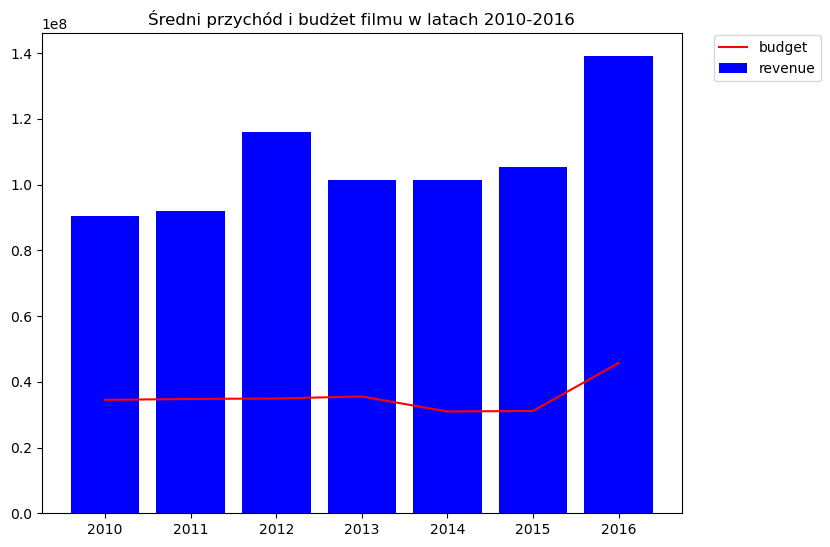

In [3]:
pd.options.display.float_format = '{:.2f}'.format

ex2 = movies[(movies['release_date'] > '2009-12-31') & (movies['release_date'] < '2017-01-01')]
ex2.sort_values('release_date', ascending=False)
ex2 = ex2.copy()
ex2['release_date'] = pd.to_datetime(ex2['release_date'], format='%Y-%m-%d')


chart = ex2.groupby(ex2['release_date'].map(lambda x: x.year)).mean()

x = chart.index
y = chart['budget']
z = chart['revenue'] 

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y, color='red', label='budget')
axes.bar(x, z, color='blue', label='revenue')
plt.title("Średni przychód i budżet filmu w latach 2010-2016")

axes.legend(loc=(1.05,0.9))

plt.show()




In [4]:
genres.rename(columns={'Unnamed: 0': 'genre_id'}, inplace=True)
ex3 = movies.merge(genres,on='genre_id',how='inner')
ex3

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.44,2009-12-10,2787965087,162.00,Released,Enter the World of Pandora.,Avatar,7.20,11800,28.00,Action
1,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.38,2015-10-26,880674609,148.00,Released,A Plan No One Escapes,Spectre,6.30,4466,28.00,Action
2,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31,2012-07-16,1084939099,165.00,Released,The Legend Ends,The Dark Knight Rises,7.60,9106,28.00,Action
3,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.93,2012-03-07,284139100,132.00,Released,"Lost in our world, found in another.",John Carter,6.10,2124,28.00,Action
4,7,280000000,http://marvel.com/movies/movie/193/avengers_ag...,99861,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.28,2015-04-22,1405403694,141.00,Released,A New Age Has Come.,Avengers: Age of Ultron,7.30,6767,28.00,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4714,0,NaN,282128,en,An American in Hollywood,A talented young filmmaker from New York sets ...,0.02,2014-07-18,0,89.00,Released,NaN,An American in Hollywood,0.00,0,NaN,NaN
4799,4716,0,NaN,38786,en,The Blood of My Brother: A Story of Death in Iraq,THE BLOOD OF MY BROTHER goes behind the scenes...,0.01,2005-11-25,0,90.00,Released,NaN,The Blood of My Brother: A Story of Death in Iraq,0.00,0,NaN,NaN
4800,4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.86,2012-05-03,0,98.00,Released,A New Yorker in Shanghai,Shanghai Calling,5.70,7,NaN,NaN
4801,4666,225000,http://detroitfirefilm.org/,139948,en,Burn,"A character-driven, action-packed documentary ...",0.13,2012-11-01,111300,86.00,Released,One Year on the Front Lines of the Battle to S...,Burn,6.90,6,10769.00,Foreign


In [5]:
ex3['genres'].value_counts()

Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: genres, dtype: int64

In [6]:
ex5 = ex3.groupby('genres').mean()
ex5['runtime'].sort_values(ascending=False)

genres
History           133.96
War               126.12
Western           117.93
Drama             115.52
Adventure         113.06
Crime             112.14
TV Movie          110.50
Action            109.06
Science Fiction   109.03
Romance           107.09
Fantasy           106.49
Thriller          105.69
Music             102.85
Mystery           100.61
Comedy            100.46
Horror             94.75
Documentary        93.51
Family             89.80
Animation          89.55
Foreign            83.00
Name: runtime, dtype: float64

<AxesSubplot:>

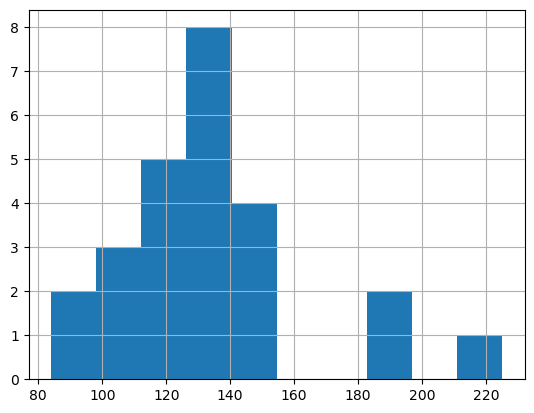

In [7]:
ex3.set_index(['genres','runtime'],inplace = True)
ex6 = ex3.loc['History']
ex6.reset_index(inplace = True)
ex6['runtime'].hist(bins=10)